## ***Singapore  Resale Flat Prices Predicting***

The objective of this project is to develop a machine learning model and deploy it 
as a user-friendly web application that predicts the resale prices of flats in 
Singapore. This predictive model will be based on historical data of resale flat 
transactions, and it aims to assist both potential buyers and sellers in estimating 
the resale value of a flat. 

In [60]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [61]:
df_1 = pd.read_csv('C:/Sudhakar/Projects/Singapore  Resale Flat Prices Predicting/Dataset & Documents/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv')

In [62]:
df_1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [63]:
df_2 = pd.read_csv('C:/Sudhakar/Projects/Singapore  Resale Flat Prices Predicting/Dataset & Documents/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv')

In [64]:
df_2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [65]:
df_3 = pd.read_csv('C:/Sudhakar/Projects/Singapore  Resale Flat Prices Predicting/Dataset & Documents/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv')

In [66]:
df_3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [67]:
df_4 = pd.read_csv('C:/Sudhakar/Projects/Singapore  Resale Flat Prices Predicting/Dataset & Documents/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv')

In [68]:
df_4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [69]:
df_5 = pd.read_csv('C:/Sudhakar/Projects/Singapore  Resale Flat Prices Predicting/Dataset & Documents/Resale flat prices based on registration date from Jan-2017 onwards.csv')

In [70]:
df_5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [71]:
df_4.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [72]:
df_5.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

Total i get 5 dataset based on the yearwise from the website till current date

3 dataset contain 10 columns and 2 dataset having 11 columns, 3 dataset missing the 'remaining_lease' column data

So i will continue the prediction use 'remaining_lease' columns containg dataset for further process

In [73]:
# I will use df_3 and df_5 => i will merge these 2 database 

df_6 = pd.concat([df_3, df_5], axis = 0)
df_6.reset_index(drop= True, inplace= True)
df_6.head()
# df_6 = 239552 rows × 11 columns


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [74]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239552 entries, 0 to 239551
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                239552 non-null  object 
 1   town                 239552 non-null  object 
 2   flat_type            239552 non-null  object 
 3   block                239552 non-null  object 
 4   street_name          239552 non-null  object 
 5   storey_range         239552 non-null  object 
 6   floor_area_sqm       239552 non-null  float64
 7   flat_model           239552 non-null  object 
 8   lease_commence_date  239552 non-null  int64  
 9   remaining_lease      239552 non-null  object 
 10  resale_price         239552 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 20.1+ MB


In [75]:
# The above dataframe does not contain any null values so we can proceed the further process
df_6.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

Need to encoding the categoriacal data and change the datatype as "INTEGER", This will helpfull to make the prediction


In [76]:
df_6.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [77]:
# Creating a new column "address"
df_6["address"]= df_6["block"]+" "+df_6["street_name"]

In [78]:
#droping the "street_name" and "block"
df_7= df_6.drop(columns=["block","street_name"])

In [79]:
df_7

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10
2,2015-01,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4
3,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10
4,2015-01,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10
...,...,...,...,...,...,...,...,...,...,...
239547,2025-02,YISHUN,EXECUTIVE,01 TO 03,142.0,Apartment,1987,61 years 08 months,830000.0,643 YISHUN ST 61
239548,2025-02,YISHUN,EXECUTIVE,07 TO 09,146.0,Maisonette,1986,60 years 05 months,818888.0,723 YISHUN ST 71
239549,2025-01,YISHUN,EXECUTIVE,01 TO 03,146.0,Maisonette,1988,62 years 02 months,960000.0,836 YISHUN ST 81
239550,2025-02,YISHUN,EXECUTIVE,01 TO 03,145.0,Apartment,1987,61 years 10 months,868888.0,824 YISHUN ST 81


In [80]:
# for month columnd dtype as Object, we need change as datatime format
df_7["month"] = pd.to_datetime(df_7["month"], format="%Y-%m")

In [81]:
#spliting the month column to "Year", "month", "day"
df_7["year"]= df_7["month"].dt.year
df_7["month"]= df_7["month"].dt.month

In [82]:
df_7.town.nunique()      #   df_7['town'].nunique()   => Both are giving same result

26

In [83]:
df_7.town.unique()          #   df_7['town'].nunique()   => Both are giving same result

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [84]:
df_7.flat_model.nunique()   # df_7['flat_model'].nunique()   => Both are giving same result


21

In [85]:
df_7.flat_model.unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [86]:
df_7.flat_type.nunique()

7

In [87]:
df_7.flat_type.unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [88]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_7["town"]= LabelEncoder().fit_transform(df_7["town"])
df_7["flat_model"]= OrdinalEncoder().fit_transform(df_7[["flat_model"]])
df_7["flat_type"]= OrdinalEncoder().fit_transform(df_7[["flat_type"]])

In [89]:
df_7.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,0,2.0,07 TO 09,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,0,2.0,01 TO 03,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015
2,1,0,2.0,01 TO 03,69.0,12.0,1980,64,285000.0,163 ANG MO KIO AVE 4,2015
3,1,0,2.0,01 TO 03,68.0,12.0,1979,63,290000.0,446 ANG MO KIO AVE 10,2015
4,1,0,2.0,07 TO 09,68.0,12.0,1980,64,290000.0,557 ANG MO KIO AVE 10,2015


In [90]:
print(df_7.town.unique())
print(df_7.flat_model.unique())
print(df_7.flat_type.unique())      #   print(df_7['flat_model'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
[ 5. 12.  8. 17. 16. 13.  7.  3. 10. 19. 20.  2. 18.  4.  9. 15. 11. 14.
  6.  0.  1.]
[2. 3. 4. 1. 5. 0. 6.]


In [91]:
df_7.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,0,2.0,07 TO 09,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,0,2.0,01 TO 03,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015
2,1,0,2.0,01 TO 03,69.0,12.0,1980,64,285000.0,163 ANG MO KIO AVE 4,2015
3,1,0,2.0,01 TO 03,68.0,12.0,1979,63,290000.0,446 ANG MO KIO AVE 10,2015
4,1,0,2.0,07 TO 09,68.0,12.0,1980,64,290000.0,557 ANG MO KIO AVE 10,2015


In [92]:
df_7[["storey_start", "storey_end"]]= df_7["storey_range"].str.split(" TO ",expand=True)

In [93]:
#droping the "storey_range" column
df_7.drop(columns=["storey_range"],inplace= True)

In [94]:
df_7.head()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09
1,1,0,2.0,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,01,03
2,1,0,2.0,69.0,12.0,1980,64,285000.0,163 ANG MO KIO AVE 4,2015,01,03
3,1,0,2.0,68.0,12.0,1979,63,290000.0,446 ANG MO KIO AVE 10,2015,01,03
4,1,0,2.0,68.0,12.0,1980,64,290000.0,557 ANG MO KIO AVE 10,2015,07,09


In [95]:
df_7["address"].nunique()

9654

In [96]:
# Address have 99654559 unique values in the 239552 , so i encode it for the correlation checking
# I chooshing the "LabelEncoder" for the "address" column

df_7["address"]= LabelEncoder().fit_transform(df_7["address"])

In [97]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239552 entries, 0 to 239551
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                239552 non-null  int32  
 1   town                 239552 non-null  int64  
 2   flat_type            239552 non-null  float64
 3   floor_area_sqm       239552 non-null  float64
 4   flat_model           239552 non-null  float64
 5   lease_commence_date  239552 non-null  int64  
 6   remaining_lease      239552 non-null  object 
 7   resale_price         239552 non-null  float64
 8   address              239552 non-null  int64  
 9   year                 239552 non-null  int32  
 10  storey_start         239552 non-null  object 
 11  storey_end           239552 non-null  object 
dtypes: float64(4), int32(2), int64(3), object(3)
memory usage: 20.1+ MB


In [98]:
df_7["storey_start"]= df_7["storey_start"].astype(int)
df_7["storey_end"]= df_7["storey_end"].astype(int)

In [99]:
df_7.remaining_lease.unique()

array([70, 65, 64, 63, 62, 69, 60, 61, 86, 77, 80, 90, 87, 66, 58, 94, 71,
       68, 84, 73, 79, 76, 72, 82, 74, 67, 88, 81, 89, 53, 54, 55, 57, 93,
       83, 85, 92, 91, 59, 95, 52, 51, 56, 75, 96, 78, 50, 97, 49, 48,
       '61 years 04 months', '60 years 07 months', '62 years 05 months',
       '62 years 01 month', '63 years', '61 years 06 months',
       '58 years 04 months', '59 years 08 months', '59 years 06 months',
       '60 years', '62 years 08 months', '61 years', '60 years 10 months',
       '59 years 03 months', '61 years 05 months', '60 years 04 months',
       '62 years', '60 years 03 months', '63 years 09 months',
       '61 years 01 month', '61 years 10 months', '58 years 06 months',
       '59 years 04 months', '62 years 11 months', '60 years 08 months',
       '93 years 08 months', '93 years 07 months', '60 years 01 month',
       '94 years 08 months', '78 years 04 months', '60 years 06 months',
       '62 years 06 months', '58 years', '70 years 08 months',
       

In [100]:
df_7.remaining_lease.nunique()

735

In [101]:
# "remaining_lease" have a "58 years 06 months" this type of data ,
# so we want to split the year and month separately for the correlation checking

slice_values= []
for i in df_7["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [102]:
df_7

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,1661,2015,7,9
1,1,0,2.0,68.0,12.0,1981,65,275000.0,6637,2015,1,3
2,1,0,2.0,69.0,12.0,1980,64,285000.0,1492,2015,1,3
3,1,0,2.0,68.0,12.0,1979,63,290000.0,5466,2015,1,3
4,1,0,2.0,68.0,12.0,1980,64,290000.0,6791,2015,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...
239547,2,25,5.0,142.0,3.0,1987,61 years 08 months,830000.0,7562,2025,1,3
239548,2,25,5.0,146.0,7.0,1986,60 years 05 months,818888.0,8352,2025,7,9
239549,1,25,5.0,146.0,7.0,1988,62 years 02 months,960000.0,8999,2025,1,3
239550,2,25,5.0,145.0,3.0,1987,61 years 10 months,868888.0,8933,2025,1,3


In [103]:
data_df = pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])
data_df

,remaining_lease_year,remaining_lease_month
0,70,None
1,65,None
2,64,None
3,63,None
4,64,None
...,...,...
239547,61,08
239548,60,05
239549,62,02
239550,61,10


In [104]:
data_df["remaining_lease_year"]= data_df["remaining_lease_year"].astype(int)
data_df["remaining_lease_month"]= data_df["remaining_lease_month"].fillna(0).astype(int)

In [105]:
#droping the "remaining_lease" column
df_7.drop(columns=["remaining_lease"],inplace= True)

In [106]:
df_8 = pd.concat([df_7, data_df],axis=1)

In [107]:
df_8

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,year,storey_start,storey_end,remaining_lease_year,remaining_lease_month
0,1,0,2.0,60.0,5.0,1986,255000.0,1661,2015,7,9,70,0
1,1,0,2.0,68.0,12.0,1981,275000.0,6637,2015,1,3,65,0
2,1,0,2.0,69.0,12.0,1980,285000.0,1492,2015,1,3,64,0
3,1,0,2.0,68.0,12.0,1979,290000.0,5466,2015,1,3,63,0
4,1,0,2.0,68.0,12.0,1980,290000.0,6791,2015,7,9,64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239547,2,25,5.0,142.0,3.0,1987,830000.0,7562,2025,1,3,61,8
239548,2,25,5.0,146.0,7.0,1986,818888.0,8352,2025,7,9,60,5
239549,1,25,5.0,146.0,7.0,1988,960000.0,8999,2025,1,3,62,2
239550,2,25,5.0,145.0,3.0,1987,868888.0,8933,2025,1,3,61,10


In [108]:
df_8.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [109]:
len(df_8.columns)

13

In [110]:
# set the columns
df_9 = df_8[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [111]:
df_10 =df_9.sort_values(by=["year","month"])

In [112]:
# df_10.to_csv("Resale_Flat_Prices.csv", index= False)

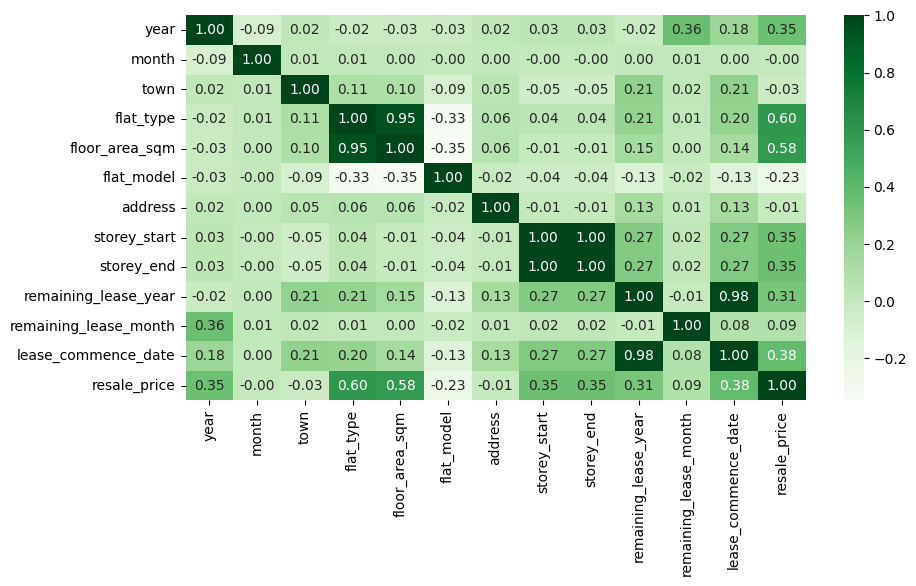

In [113]:
# Checking the Correlation using heatmap

df_10_corr= df_10.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_10_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [114]:
final_df = pd.read_csv(r"Resale_Flat_Prices.csv")
final_df.head()

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1661,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6637,1,3,65,0,1981,275000.0
2,2015,1,0,2.0,69.0,12.0,1492,1,3,64,0,1980,285000.0
3,2015,1,0,2.0,68.0,12.0,5466,1,3,63,0,1979,290000.0
4,2015,1,0,2.0,68.0,12.0,6791,7,9,64,0,1980,290000.0


In [115]:
# checking the duplicate values
final_df.duplicated().sum()

np.int64(322)

In [116]:
# We found totall 322 duplicate columns so we need to drop from the origibal dataset frame

final_df_1= final_df.drop_duplicates()
final_df_1.reset_index(drop= True, inplace= True)

In [117]:
final_df_1.duplicated().sum()

np.int64(0)

The month,address column does have very lowest correlation with other features

So I drop the month and address columns

In [118]:
final_df_2= final_df_1.drop(columns=["month","address"])

In [119]:
final_df_2

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,0,2.0,60.0,5.0,7,9,70,0,1986,255000.0
1,2015,0,2.0,68.0,12.0,1,3,65,0,1981,275000.0
2,2015,0,2.0,69.0,12.0,1,3,64,0,1980,285000.0
3,2015,0,2.0,68.0,12.0,1,3,63,0,1979,290000.0
4,2015,0,2.0,68.0,12.0,7,9,64,0,1980,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
239225,2025,25,4.0,113.0,5.0,1,3,92,8,2018,708000.0
239226,2025,25,4.0,112.0,5.0,4,6,89,10,2015,688000.0
239227,2025,25,4.0,131.0,5.0,4,6,61,8,1987,638888.0
239228,2025,25,4.0,129.0,5.0,4,6,60,9,1986,700000.0


In [120]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

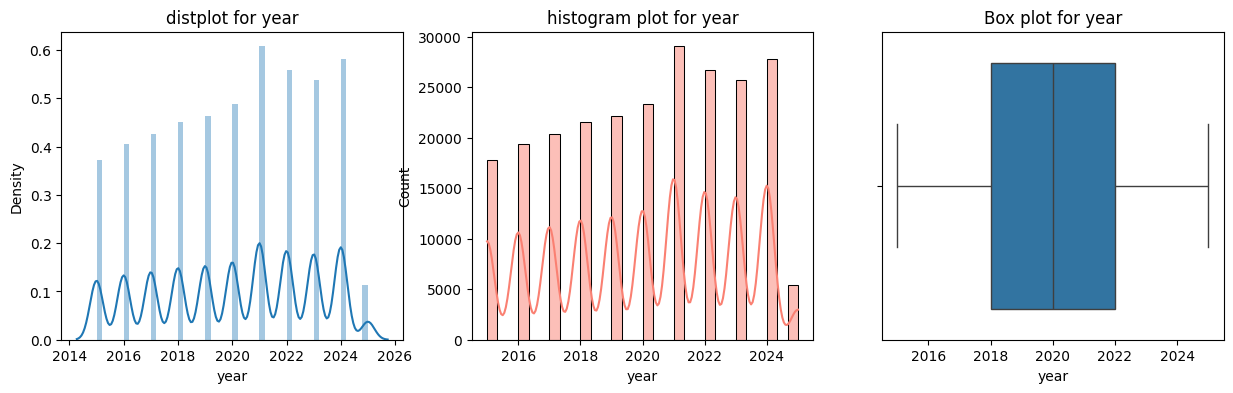

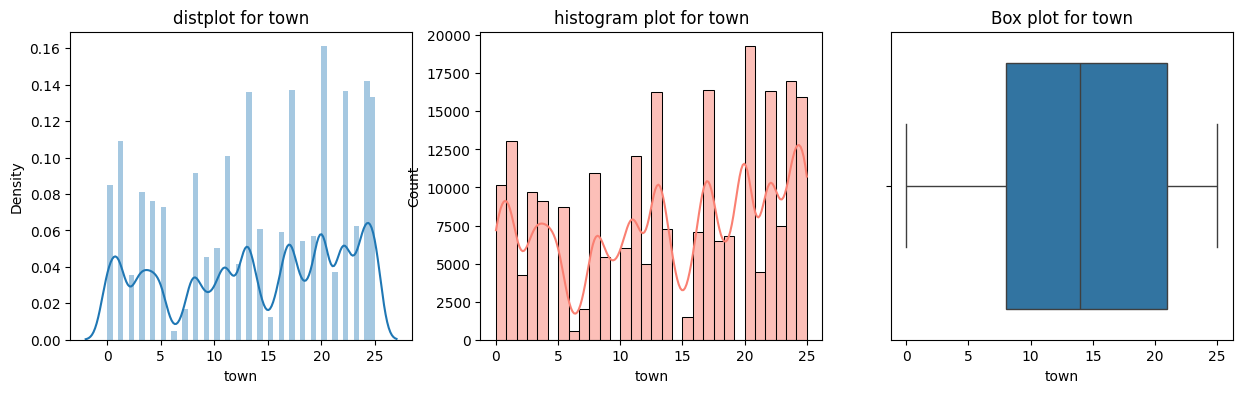

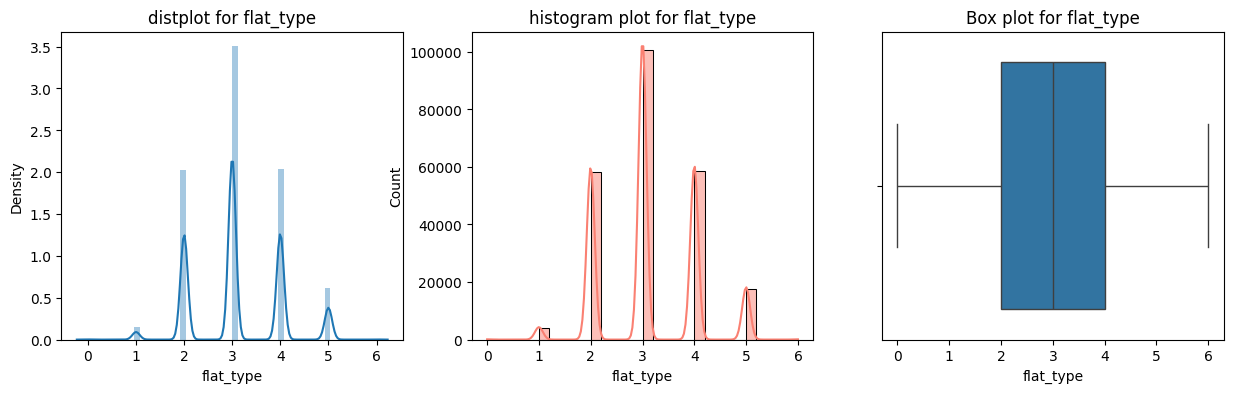

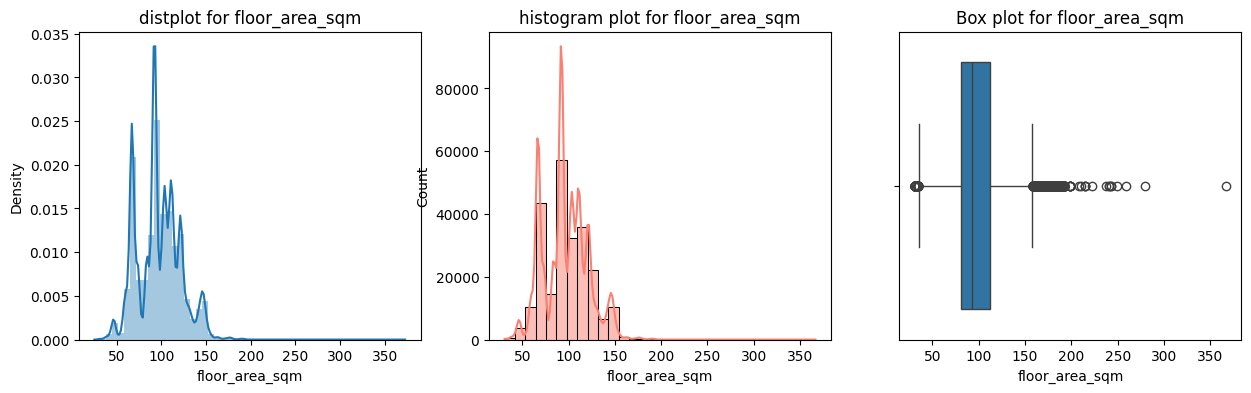

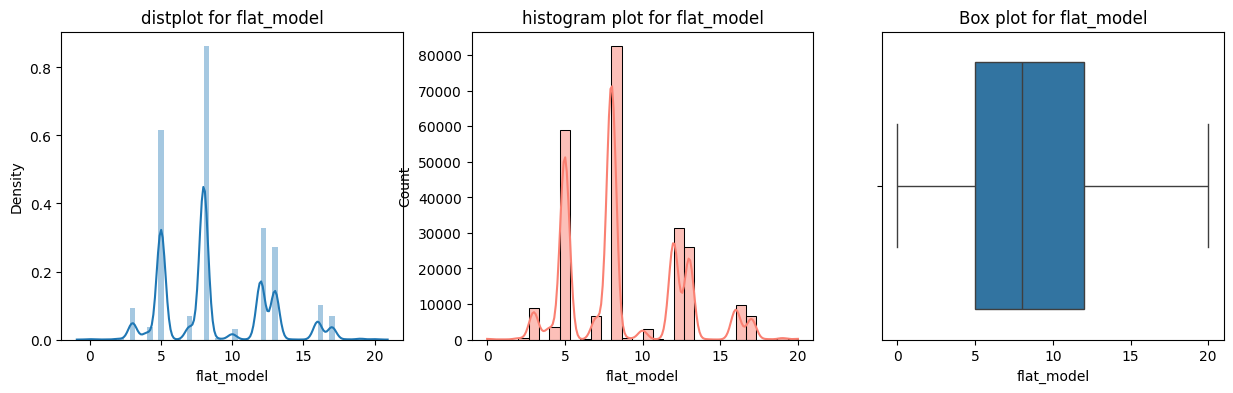

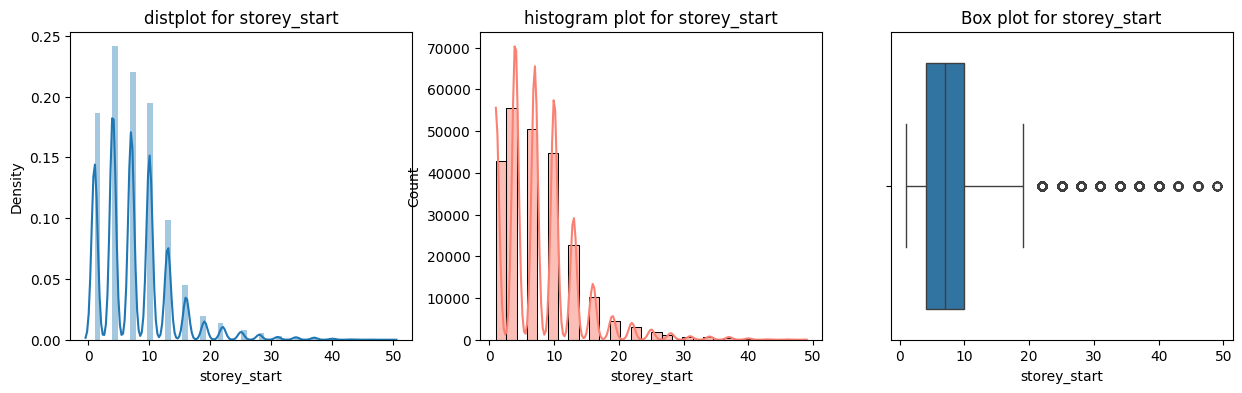

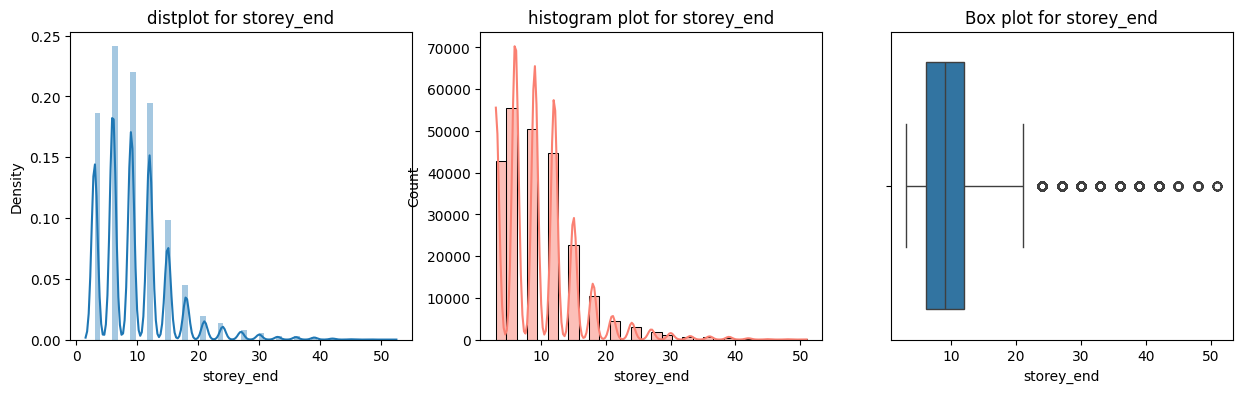

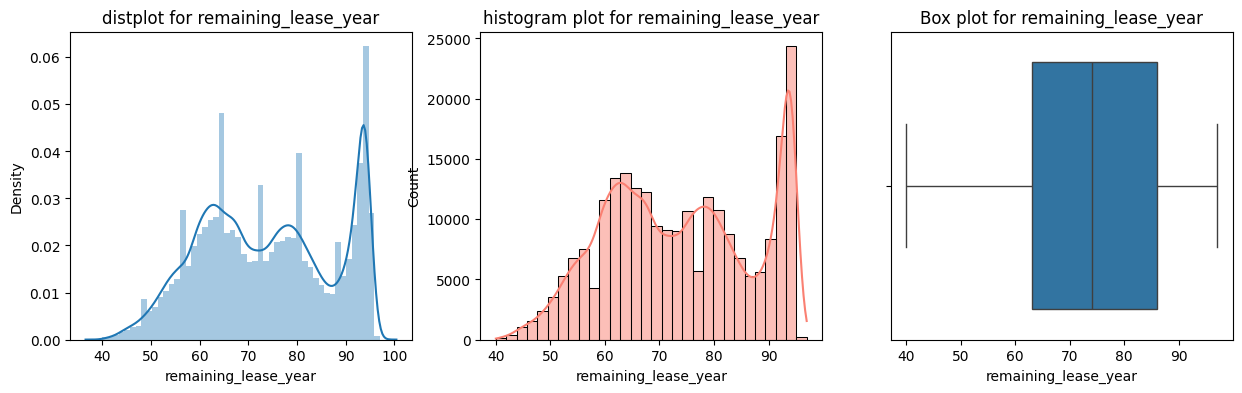

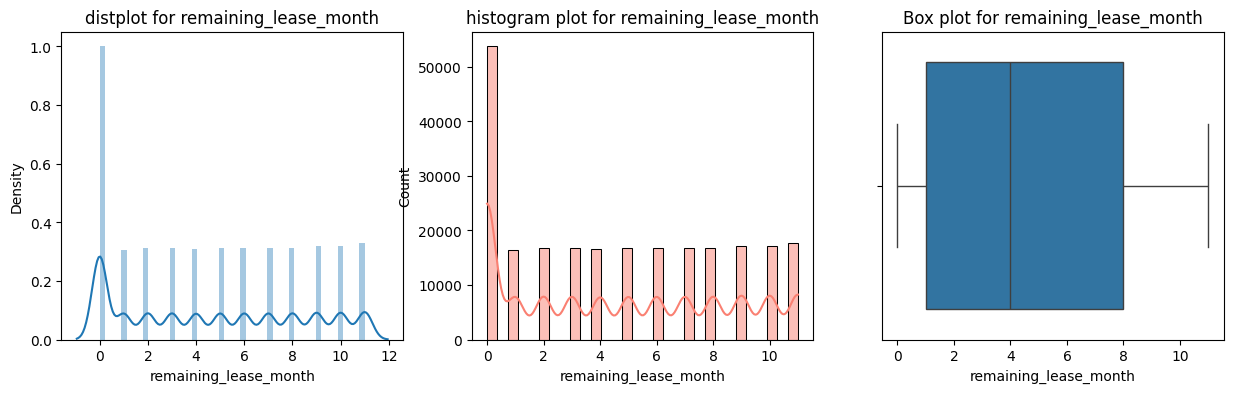

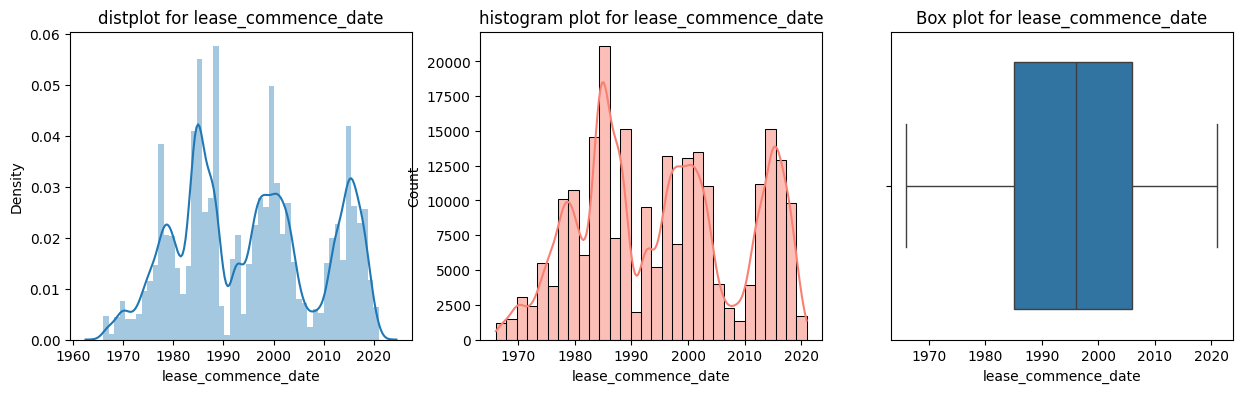

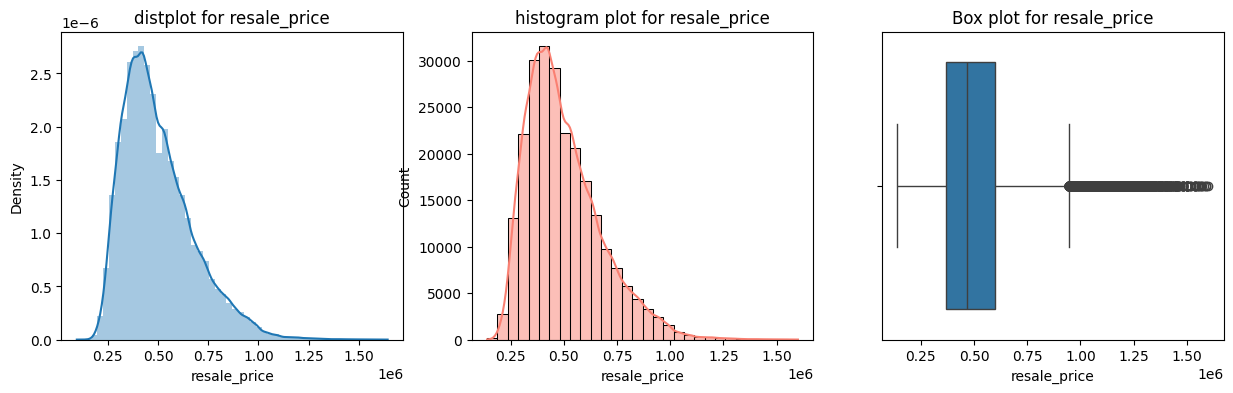

In [121]:
for i in final_df_2.columns:
    plot(final_df_2,i)

In [122]:
final_df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,239230.0,2020.022807,2.886471,2015.0,2018.0,2020.0,2022.0,2025.0
town,239230.0,13.903256,7.954276,0.0,8.0,14.0,21.0,25.0
flat_type,239230.0,3.114459,0.919592,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,239230.0,96.954736,24.061514,31.0,81.0,93.0,112.0,366.7
flat_model,239230.0,8.678560,3.635968,0.0,5.0,8.0,12.0,20.0
storey_start,239230.0,7.665209,5.854389,1.0,4.0,7.0,10.0,49.0
storey_end,239230.0,9.665209,5.854389,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,239230.0,73.955219,13.654760,40.0,63.0,74.0,86.0,97.0
remaining_lease_month,239230.0,4.692371,3.767193,0.0,1.0,4.0,8.0,11.0
lease_commence_date,239230.0,1995.412373,13.855377,1966.0,1985.0,1996.0,2006.0,2021.0


## skewness handling

In [123]:
final_df_3= final_df_2.copy()

In [124]:
# The Skewness Columns are
# 1. storey_start
# 2. storey_end
# 3. resale_price

In [125]:
final_df_3["storey_start"]= np.log(final_df_3["storey_start"])
final_df_3["storey_end"]= np.log(final_df_3["storey_end"])
final_df_3["resale_price"]= np.log(final_df_3["resale_price"])

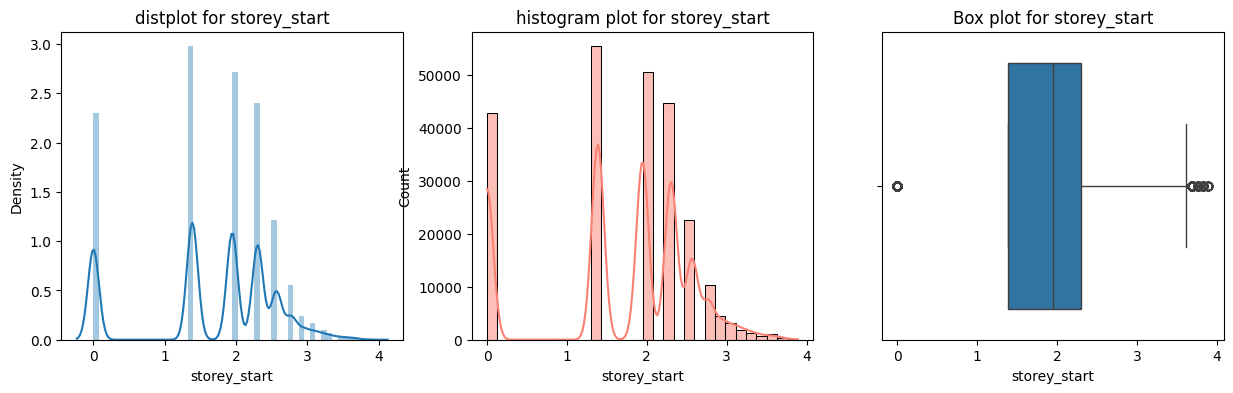

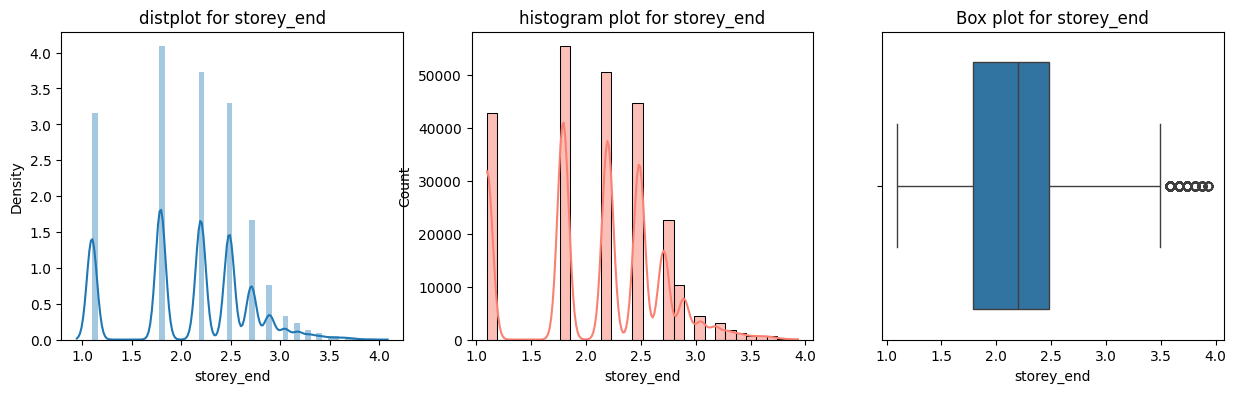

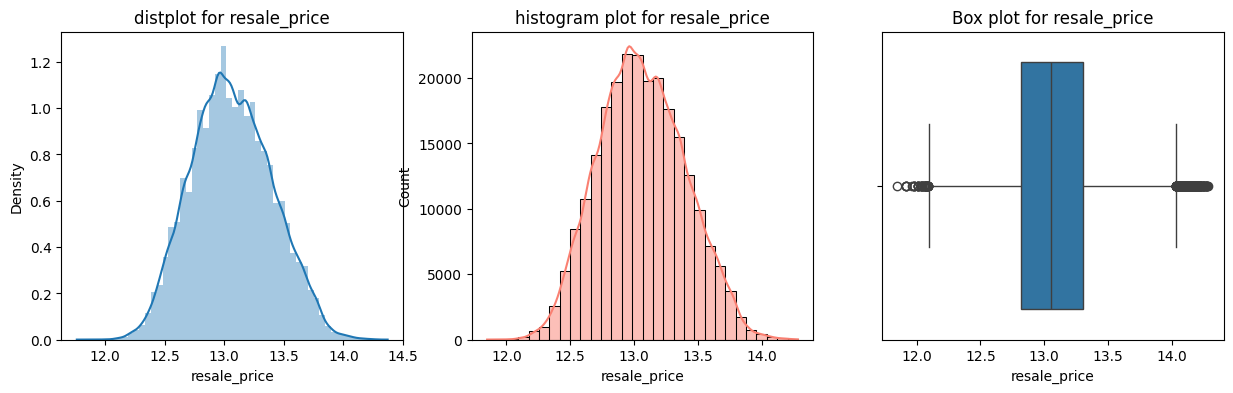

In [126]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(final_df_3,i)

## Outliers Handling - Interquartile Range(IQR) Method

In [127]:
final_df_4= final_df_3.copy()

The Outlier Columns are
1. floor_area_sqm
2. storey_start
3. sortey_end
4. resale_price

Recorrect the Outliers

(Ex: lower threshold = 5 and upper threshold = 20)

above upper threshold values (>20) are converted to upper threshold value (20) in features

below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [128]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [129]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(final_df_4,j)

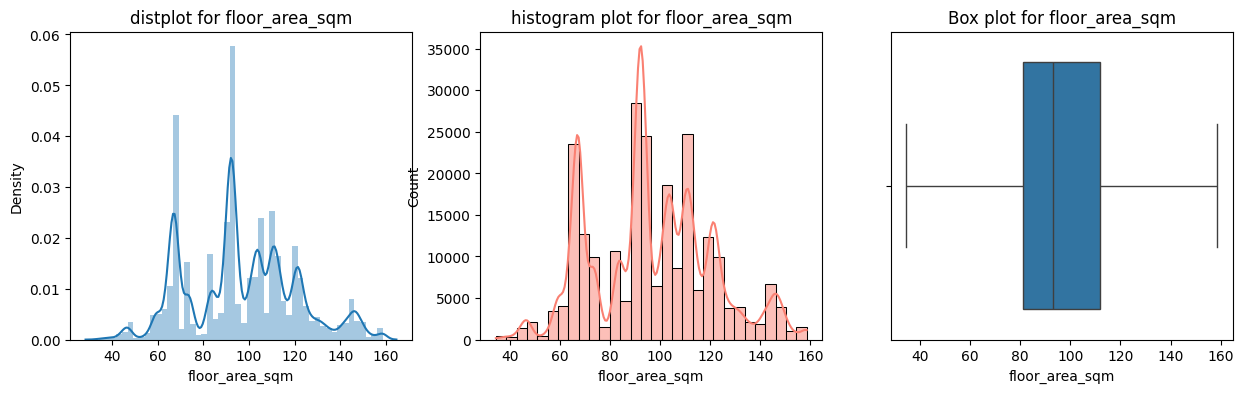

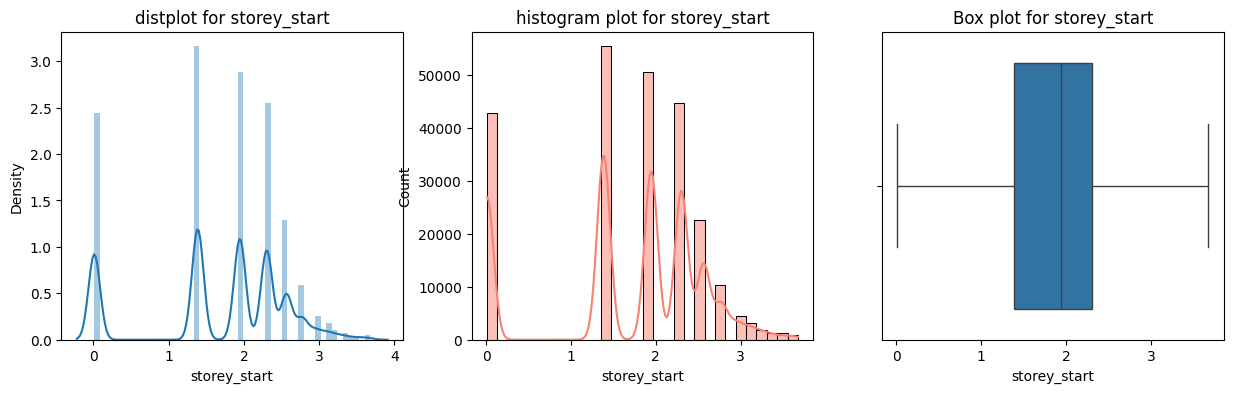

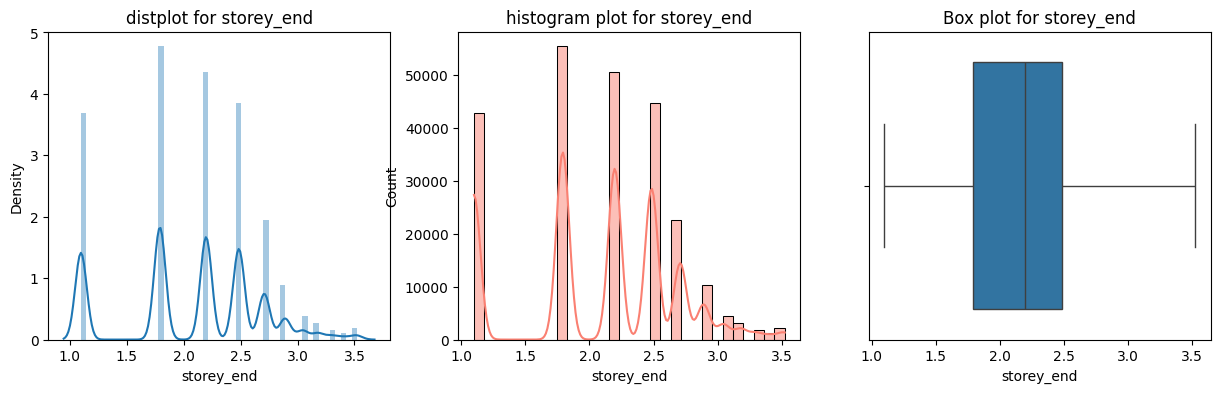

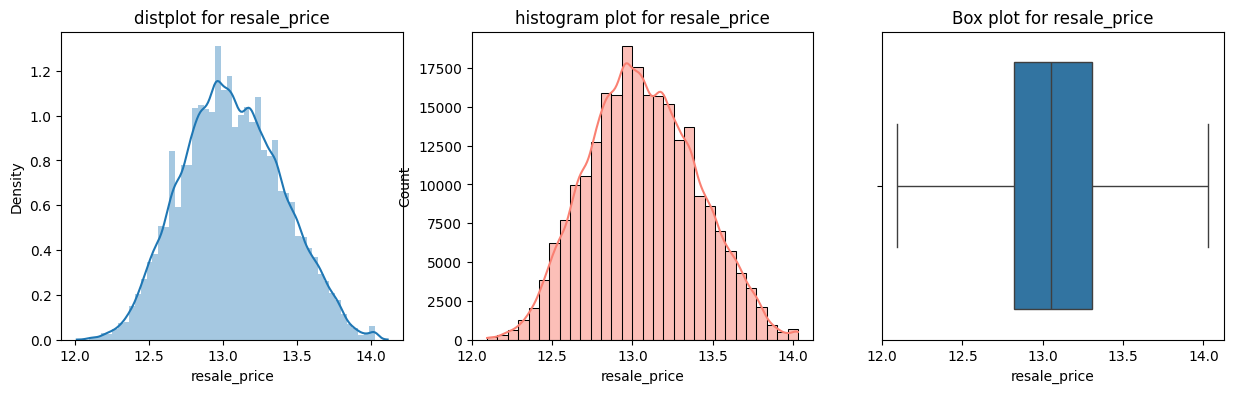

In [130]:
for k in outlier_columns:
    plot(final_df_4,k)

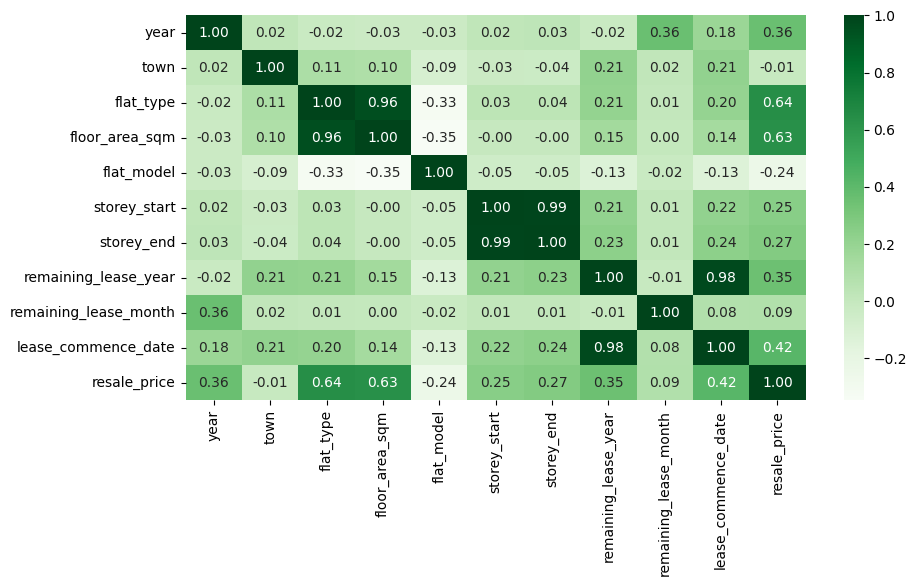

In [131]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(final_df_4.corr(), annot= True, cmap="Greens", fmt="0.2f")
plt.show()

## Model Selection => Regression

In [162]:
final_df_5

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,0,2.0,60.0,5.0,1.945910,2.197225,70,0,1986,12.449019
1,2015,0,2.0,68.0,12.0,0.011858,1.098612,65,0,1981,12.524526
2,2015,0,2.0,69.0,12.0,0.011858,1.098612,64,0,1980,12.560244
3,2015,0,2.0,68.0,12.0,0.011858,1.098612,63,0,1979,12.577636
4,2015,0,2.0,68.0,12.0,1.945910,2.197225,64,0,1980,12.577636
...,...,...,...,...,...,...,...,...,...,...,...
239225,2025,25,4.0,113.0,5.0,0.011858,1.098612,92,8,2018,13.470199
239226,2025,25,4.0,112.0,5.0,1.386294,1.791759,89,10,2015,13.441544
239227,2025,25,4.0,131.0,5.0,1.386294,1.791759,61,8,1987,13.367484
239228,2025,25,4.0,129.0,5.0,1.386294,1.791759,60,9,1986,13.458836


In [132]:
final_df_5= final_df_4.copy()

In [133]:
final_df_5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,239230.0,2020.022807,2.886471,2015.000000,2018.000000,2020.000000,2022.000000,2025.000000
town,239230.0,13.903256,7.954276,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,239230.0,3.114459,0.919592,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,239230.0,96.881643,23.824736,34.500000,81.000000,93.000000,112.000000,158.500000
flat_model,239230.0,8.678560,3.635968,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,239230.0,1.695809,0.921840,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,239230.0,2.093698,0.602000,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,239230.0,73.955219,13.654760,40.000000,63.000000,74.000000,86.000000,97.000000
remaining_lease_month,239230.0,4.692371,3.767193,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,239230.0,1995.412373,13.855377,1966.000000,1985.000000,1996.000000,2006.000000,2021.000000


In [134]:
np.exp(14.029825)

np.float64(1239012.1910626017)

In [135]:
#checking how many datas are outliers based on resale_price
final_df_1[final_df_1["resale_price"] >= 1239012]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
115386,2020,9,7,4.0,107.0,20.0,1966,43,45,89,4,2011,1258000.0
120253,2020,11,7,4.0,105.0,20.0,1965,49,51,89,3,2011,1248000.0
131869,2021,4,2,4.0,120.0,4.0,3253,31,33,89,5,2011,1250000.0
136988,2021,6,14,2.0,210.0,18.0,4704,1,3,50,1,1972,1268000.0
141111,2021,8,2,4.0,120.0,4.0,3249,22,24,89,1,2011,1240000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238465,2025,3,7,3.0,95.0,19.0,1971,22,24,84,11,2011,1300000.0
239102,2025,3,23,4.0,113.0,5.0,230,13,15,94,6,2020,1330000.0
239103,2025,3,23,4.0,114.0,5.0,201,16,18,94,6,2020,1340000.0
239104,2025,3,23,4.0,113.0,5.0,233,1,3,94,6,2020,1268000.0


In [136]:
np.exp(12.096118)

np.float64(179174.95326003587)

In [137]:
#checking how many datas are outliers based on resale_price
final_df_1[final_df_1["resale_price"] <= 179174]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
47067,2017,7,4,0.0,31.0,5.0,8140,4,6,56,8,1975,175000.0
62989,2018,4,21,2.0,64.0,5.0,3584,13,15,59,2,1978,170000.0
65495,2018,6,4,0.0,31.0,5.0,8140,1,3,55,10,1975,176000.0
65810,2018,6,10,1.0,42.0,17.0,5240,4,6,51,7,1971,178000.0
66004,2018,6,13,1.0,56.0,5.0,426,1,3,51,3,1970,175000.0
66007,2018,6,13,2.0,59.0,5.0,1831,1,3,56,4,1975,175000.0
70007,2018,8,4,0.0,31.0,5.0,8140,7,9,55,7,1975,168000.0
72361,2018,9,10,1.0,47.0,17.0,4703,4,6,51,4,1971,160000.0
76004,2018,11,4,0.0,31.0,5.0,8140,1,3,55,4,1975,168000.0
79281,2019,1,4,0.0,31.0,5.0,8140,7,9,55,2,1975,172000.0


In [157]:
final_df_5.columns


Index(['year', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [138]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [139]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [140]:
select_model(final_df_5, LinearRegression)
select_model(final_df_5, DecisionTreeRegressor)
select_model(final_df_5, RandomForestRegressor)
select_model(final_df_5, AdaBoostRegressor)
select_model(final_df_5, ExtraTreesRegressor)
select_model(final_df_5, GradientBoostingRegressor)
select_model(final_df_5, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.68907551052152, 'Mean_squared_error': 0.03536842377862573, 'Root_mean_squared_error': np.float64(0.1880649456401318), 'Mean_absolute_error': 0.14698498442110933}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.6936660815328257, 'Mean_squared_error': 0.03510248553093686, 'Root_mean_squared_error': np.float64(0.18735657322585952), 'Mean_absolute_error': 0.1464142789222581}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.996515023800252, 'Mean_squared_error': 0.00039642459588131145, 'Root_mean_squared_error': np.float64(0.01991041425689861), 'Mean_absolute_error': 0.007016297345094438}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9277649154720721, 'Mean_squared_error': 0.008277343306138983, 'Root_mean_squared_error': np.float64(0.09097990605699141), 'Mean_absolute_error': 0.06453641811881082}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.

In [141]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= final_df_5.drop(columns=["resale_price"])
y= final_df_5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9568316718888259, 'Mean_squared_error': 0.004946613879715051, 'Root_mean_squared_error': np.float64(0.07033216817157743), 'Mean_absolute_error': 0.051599095527767105}


In [142]:
final_df_5.iloc[999]

year                     2015.000000
town                       22.000000
flat_type                   3.000000
floor_area_sqm             83.000000
flat_model                 16.000000
storey_start                0.011858
storey_end                  1.098612
remaining_lease_year       77.000000
remaining_lease_month       0.000000
lease_commence_date      1993.000000
resale_price               12.847927
Name: 999, dtype: float64

In [155]:
final_df_5.year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])

In [143]:
np.exp(12.847927)

np.float64(380000.1779530658)

In [144]:
user_data = np.array([[2015,22,3,83,16,0.011858,1.098612,77.000000,0,1993]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

np.float64(12.818982056891432)

In [145]:
np.exp(12.821348544767034)

np.float64(370033.39776147256)

In [146]:
# Saving the Model unsing pickle
# with open("Resale_Flat_Prices_Model.pkl","wb") as f:
#   pickle.dump(model_1,f)

In [147]:
import pickle
import numpy as np

In [ ]:
with open("Resale_Flat_Prices_Model.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [149]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

np.float64(12.254241566000418)

In [150]:
np.exp(12.313923357750493)

np.float64(222776.28881715712)